In [21]:
from labs.install_deps import require_think_dsp

require_think_dsp()

thinkdsp.py successfully download


Упражнение 8.1

Прочитаем и позапускаем блокнот chap08.ipynb.
На интерактивном примере можем заметить, что при увеличении std и неизменном M окно становится менее сглаженным.

Упражнение 8.2

Возьмем для примера гауссово окно и вычислим его.

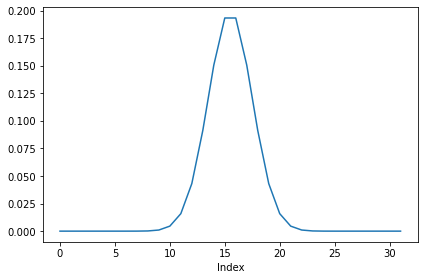

In [22]:
import matplotlib.pyplot as plt
from thinkdsp import decorate
import scipy.signal

gaussian = scipy.signal.gaussian(M=32, std=2)
gaussian /= sum(gaussian)
plt.plot(gaussian)
decorate(xlabel='Index')

Вычислим его БПФ.

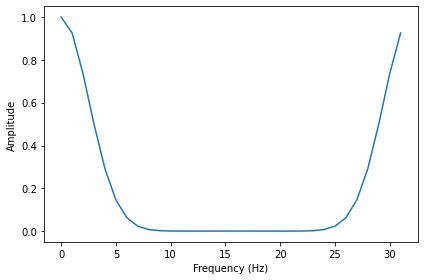

In [23]:
import numpy as np

fft_gaussian = np.fft.fft(gaussian)
plt.plot(abs(fft_gaussian))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Если мы сдвинем отрицательные частоты влево, то сможем более четко увидеть, что они гауссовы, по крайней мере приблизительно.

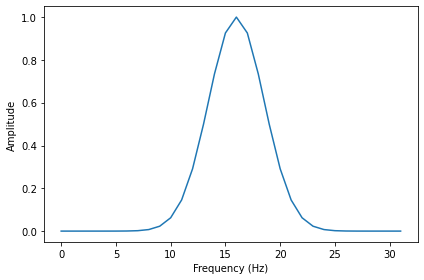

In [24]:
N = len(gaussian)
fft_rolled = np.roll(fft_gaussian, N//2)
plt.plot(abs(fft_rolled))
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Эта функция отображает окно Гаусса и его БПФ.

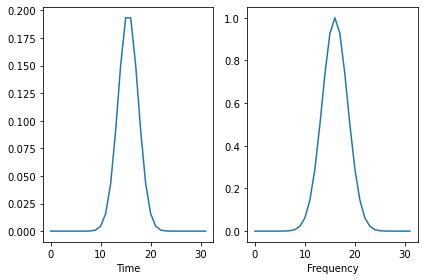

In [25]:
def plot_gaussian(std):
    M = 32
    gaussian = scipy.signal.gaussian(M=M, std=std)
    gaussian /= sum(gaussian)

    plt.subplot(1, 2, 1)
    plt.plot(gaussian)
    decorate(xlabel='Time')

    fft_gaussian = np.fft.fft(gaussian)
    fft_rolled = np.roll(fft_gaussian, M//2)

    plt.subplot(1, 2, 2)
    plt.plot(np.abs(fft_rolled))
    decorate(xlabel='Frequency')
    plt.show()

plot_gaussian(2)

Понаблюдаем, что будет происходить, если будет меняться std.

interactive(children=(FloatSlider(value=2.0, description='std', max=10.0, min=0.1), Output()), _dom_classes=('…

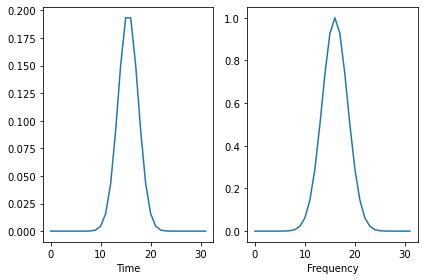

In [26]:
import matplotlib
matplotlib.use('Qt5Agg')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.FloatSlider(min=0.1, max=10, value=2)
interact(plot_gaussian, std=slider);

Когда `std` увеличивается, Гауссово окно становится шире, а его БПФ уже.

Упраженение 8.3

Создадим окно Хэмминга тех же размеров, что и Гауссово. Дополним его нулями и вычислим его ДПФ. Какое окно больше подходит для фильтра НЧ?

Создадим 1-секундную волну, дискретизированную на частоте 44,1 кГц.

In [27]:
from thinkdsp import SquareSignal

signal = SquareSignal(freq=440)
wave = signal.make_wave(duration=1.0, framerate=44100)

Создадим несколько окон. Выберем стандартное отклонение окна Гаусса, чтобы сделать его похожим на другие.

In [28]:
M = 15
std = 2.5

gaussian = scipy.signal.gaussian(M=M, std=std)
bartlett = np.bartlett(M)
blackman = np.blackman(M)
hamming = np.hamming(M)
hanning = np.hanning(M)

windows = [blackman, gaussian, hanning, hamming]
names = ['blackman', 'gaussian', 'hanning', 'hamming']

for window in windows:
    window /= sum(window)

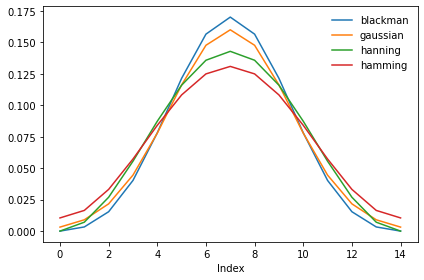

In [29]:
for window, name in zip(windows, names):
    plt.plot(window, label=name)

decorate(xlabel='Index')

Окна получились очень похожими. Посмотрим на их ДПФ.

In [30]:
def zero_pad(array, n):
    res = np.zeros(n)
    res[:len(array)] = array
    return res

In [31]:
def plot_window_dfts(windows, names):
    for window, name in zip(windows, names):
        padded =  zero_pad(window, len(wave))
        dft_window = np.fft.rfft(padded)
        plt.plot(abs(dft_window), label=name)

Тоже довольно похоже, но Хэмминг отфильтровывается быстрее всех, Блэкман медленнее всех, а у Ханнинга самые заметные боковые лепестки.

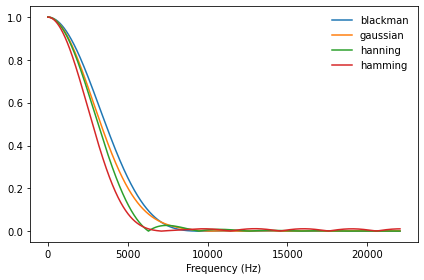

In [32]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)')

Тот же график с логарифмическим масштабом по y.

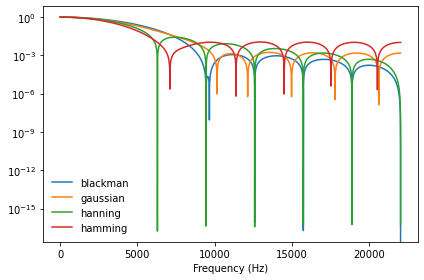

In [33]:
plot_window_dfts(windows, names)
decorate(xlabel='Frequency (Hz)', yscale='log')

В логарифмическом масштабе мы можем видеть, что Хэмминг и Ханнинг поначалу снижаются быстрее, чем два других. А окна Хэмминга и Гаусса имеют самые стойкие боковые лепестки. Окно Ханнинга имеет наилучшее сочетание фильтрации низких частот и минимальных боковых лепестков. По сравнению с Гауссовым окном, окно Хэмминга фильтрует низкие частоты лучше.